# Análisis Geoespacial de Hurtos a Persona en Medellín - 2018
Este notebook presenta un análisis descriptivo y geoespacial de los delitos de hurto a persona en Medellín durante el año 2018, utilizando datos abiertos. El objetivo es explorar patrones espaciales mediante visualización con coordenadas geográficas.

In [1]:
!pip install matplotlib
!pip install geopandas
!pip install shapely


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\johanmum\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached pyogrio-0.10.0-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
  Using cached pyproj-3.7.1-cp311-cp311-win_amd64.whl.metadata (31 kB)
  Using cached shapely-2.1.0-cp311-cp311-win_amd64.whl.metadata (7.0 kB)
Using cached geopandas-1.0.1-py3-none-any.whl (323 kB)
Using cached pyogrio-0.10.0-cp311-cp311-win_amd64.whl (16.2 MB)
Using cached pyproj-3.7.1-cp311-cp311-win_amd64.whl (6.3 MB)
Using cached shapely-2.1.0-cp311-cp311-win_amd64.whl (1.7 MB)



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\johanmum\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\johanmum\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

## Carga y visualización inicial de los datos

In [ ]:
df = pd.read_parquet('.\data\hurto_a_persona.parquet.gzip')
df.head(5)

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
0,2018-01-01T20:30:00.000-05:00,1.0,6.278325,-75.601265,Mujer,65,Soltero(a),Sin dato,Sin dato,Sin dato,...,Vía pública,Castilla,Tarjeta bancaria,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-05-26T18:12:23.000-05:00
1,2018-01-02T18:30:00.000-05:00,1.0,6.191263,-75.579916,Hombre,23,Soltero(a),Sin dato,Sin dato,Sin dato,...,Parqueadero,Poblado,Visa,Documentos,Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-05-26T18:12:23.000-05:00
2,2018-01-02T18:30:00.000-05:00,1.0,6.191263,-75.579916,Hombre,23,Soltero(a),Sin dato,Sin dato,Sin dato,...,Parqueadero,Poblado,Tarjeta bancaria,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-05-26T18:12:23.000-05:00
3,2018-01-02T18:30:00.000-05:00,1.0,6.191263,-75.579916,Hombre,23,Soltero(a),Sin dato,Sin dato,Sin dato,...,Parqueadero,Poblado,Tarjeta para computador,Tecnología,Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-05-26T18:12:23.000-05:00
4,2018-01-02T18:30:00.000-05:00,1.0,6.191263,-75.579916,Hombre,23,Soltero(a),Sin dato,Sin dato,Sin dato,...,Parqueadero,Poblado,Tarjeta bancaria,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-05-26T18:12:23.000-05:00


## Conversión de tipos de datos y limpieza

In [12]:
df['fecha_hecho'] = pd.to_datetime(df['fecha_hecho'], errors='coerce')
df['latitud'] = pd.to_numeric(df['latitud'], errors='coerce')
df['longitud'] = pd.to_numeric(df['longitud'], errors='coerce')
df = df.dropna(subset=['latitud', 'longitud'])
df.shape

(257026, 36)

## Creación de geometría tipo punto para análisis geoespacial

In [13]:
geometry = [Point(xy) for xy in zip(df['longitud'], df['latitud'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
gdf.head()

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion,geometry
0,2018-01-01 20:30:00-05:00,1.0,6.278325,-75.601265,Mujer,65,Soltero(a),Sin dato,Sin dato,Sin dato,...,Castilla,Tarjeta bancaria,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-05-26T18:12:23.000-05:00,POINT (-75.60127 6.27832)
1,2018-01-02 18:30:00-05:00,1.0,6.191263,-75.579916,Hombre,23,Soltero(a),Sin dato,Sin dato,Sin dato,...,Poblado,Visa,Documentos,Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-05-26T18:12:23.000-05:00,POINT (-75.57992 6.19126)
2,2018-01-02 18:30:00-05:00,1.0,6.191263,-75.579916,Hombre,23,Soltero(a),Sin dato,Sin dato,Sin dato,...,Poblado,Tarjeta bancaria,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-05-26T18:12:23.000-05:00,POINT (-75.57992 6.19126)
3,2018-01-02 18:30:00-05:00,1.0,6.191263,-75.579916,Hombre,23,Soltero(a),Sin dato,Sin dato,Sin dato,...,Poblado,Tarjeta para computador,Tecnología,Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-05-26T18:12:23.000-05:00,POINT (-75.57992 6.19126)
4,2018-01-02 18:30:00-05:00,1.0,6.191263,-75.579916,Hombre,23,Soltero(a),Sin dato,Sin dato,Sin dato,...,Poblado,Tarjeta bancaria,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-05-26T18:12:23.000-05:00,POINT (-75.57992 6.19126)


## Visualización inicial de la distribución geográfica de los hurtos

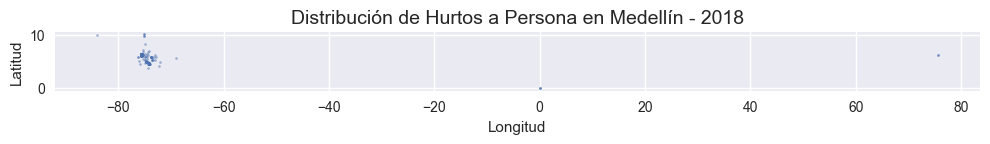

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, markersize=2, alpha=0.5)
ax.set_title('Distribución de Hurtos a Persona en Medellín - 2018', fontsize=14)
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
plt.tight_layout()
plt.show()